In [14]:
import pandas as pd
import numpy as np

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
train_df = pd.read_csv('train_features.csv')

X = train_df.drop('label', axis=1)
y = train_df['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

test_df = pd.read_csv('test_features.csv')

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']
X_test = scaler.transform(X_test)

import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [17]:
class_names = train_df['label'].unique()

In [18]:
train_df.shape

(11480, 16)

In [19]:
test_df.shape

(3280, 16)

In [20]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F1 Score: ', f1)
    
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    print('True Positive: ', true_positive)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM

Accuracy:  0.21310975609756097
Precision:  0.2140587035478608
Recall:  0.21310975609756097
F1 Score:  0.21358317578741978
True Positive:  [10 55 39 40 45 27 31 38 44 48 14 22 39 59  2 30 15 45 50 46]


['svm.pkl']

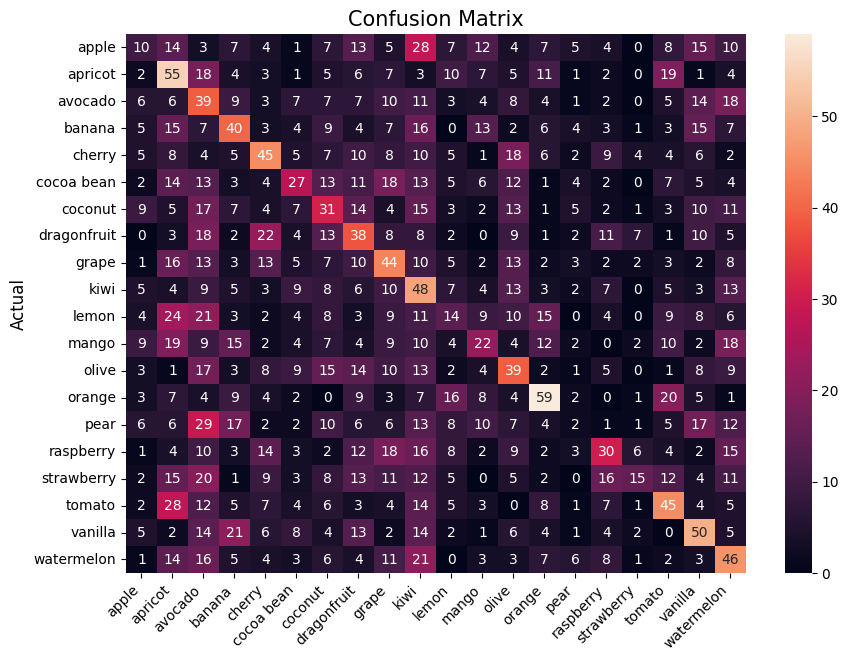

In [21]:
#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

clf = svm.SVC(kernel='rbf', C=200, gamma='auto', probability=True)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'svm.pkl')

# RANDOM FOREST

Accuracy:  0.2225609756097561
Precision:  0.2127496454396904
Recall:  0.2225609756097561
F1 Score:  0.21754474327107576
True Positive:  [12 44 32 44 57 31 29 47 36 24 12 17 49 71 12 29 31 38 69 46]


['random_forest.pkl']

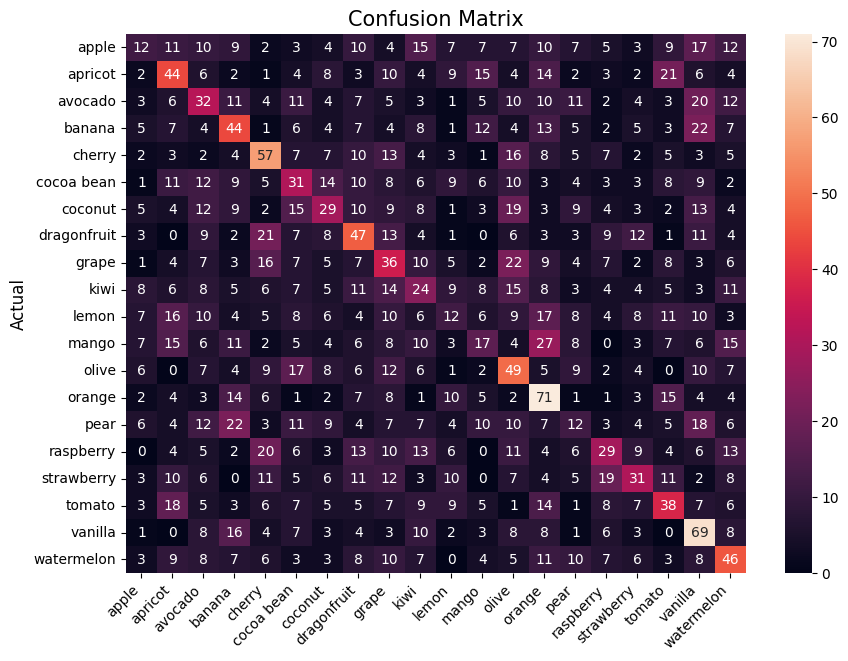

In [22]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'random_forest.pkl')

# KNN

Accuracy:  0.17560975609756097
Precision:  0.18544546595513978
Recall:  0.17560975609756097
F1 Score:  0.1803936409540544
True Positive:  [33 54 30 35 44 31 23 32 30 30 10 17 21 50 12 22 27 22 35 18]


['knn.pkl']

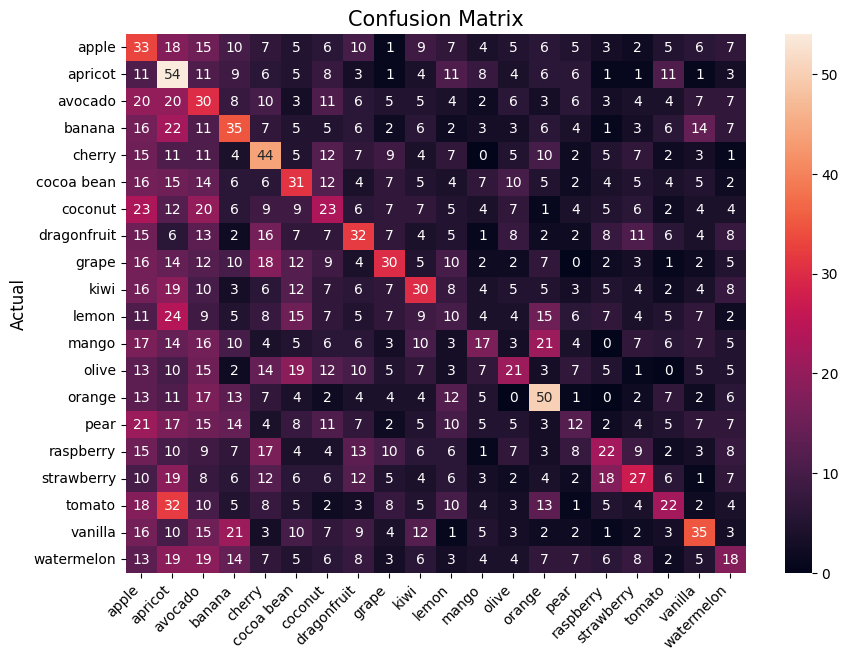

In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'knn.pkl')

# XGBOOST

Accuracy:  0.19207317073170732
Precision:  0.1902536954938273
Recall:  0.19207317073170732
F1 Score:  0.1911591037150272
True Positive:  [12 34 29 33 44 26 17 32 31 26 17 27 36 56 30 29 27 31 57 36]


['xgb_label_encoder.pkl']

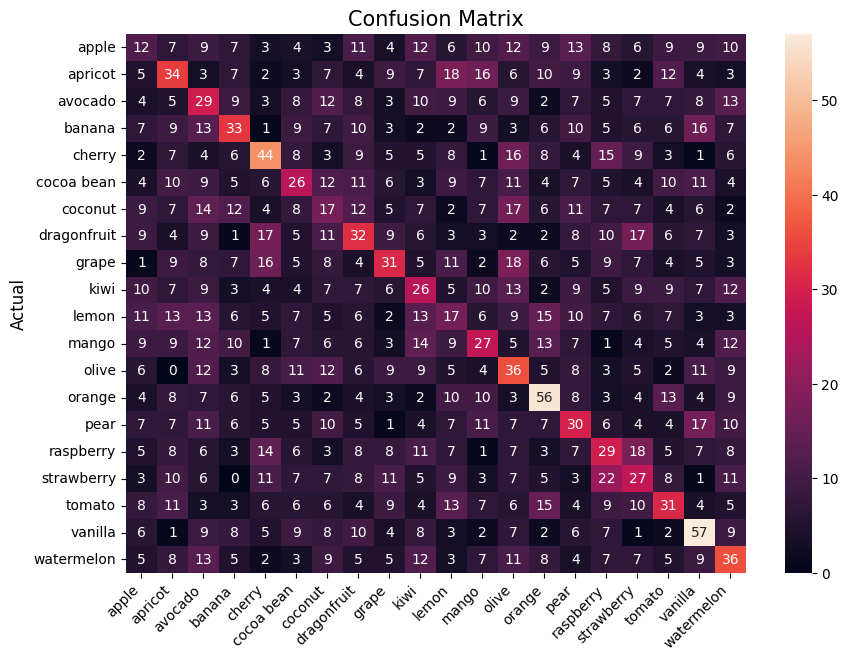

In [27]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb20_label_encoder = LabelEncoder()
y_encoded = xgb20_label_encoder.fit_transform(y)

clf = XGBClassifier(n_estimators=4000, max_depth=30, random_state=42, n_jobs=-1)
clf.fit(X, y_encoded)

y_pred = clf.predict(X_test)

y_test_encoded = xgb20_label_encoder.transform(y_test)

labels_for_plot_xgb20 = xgb20_label_encoder.inverse_transform(sorted(np.unique(y_encoded)))
results(y_pred, y_test_encoded, labels_for_plot_xgb20)

import joblib

joblib.dump(clf, 'xgb.pkl')
joblib.dump(xgb20_label_encoder, 'xgb_label_encoder.pkl')